# Wordle Analysis
Wordle is popular game that many of us like to play at the start of our day, on a commute, in class, during work, or any time boredom calls!

You as the player must guess the wordle in 6 attempts where:
* Each guess must be a valid 5-letter word.
* The color of the tiles will change to show how close your guess was to the word.
    * Green - letter in the correct position and is in the wordle
    * Yellow - letter is in the wrong position and is in the wordle
    * Grey - letter is not in the wordle

It's simple, all you have to do is guess the 5 letter word (wordle) within 6 attempts and you win, well aside from the fact that there are 2,309 words that could be the wordle. 

This is where the analysis comes into play, the aim of this analysis is to gain insights and identify potential patterns between potential guesses the player can make and valid solution words. This can help to formulate strategies to make better guesses and reduce the number of attempts to guess the wordle. Hopefully it brings some value to your next wordle game. 

In [7]:
import pandas as pd
import seaborn as sns

## Data Extraction
The datasets that are being extracted are, the valid guesses that the player can make and the solution bank of words that could potentially be the wordle.

Valid guesses are words or set of letters that players can input to use as a guess to give clues of what letters are in the wordle.
The solution bank contains all the possible words that could be selected as the wordle. As of now it is a defined set and new words are yet to be added however this anaylsis will be updated once more words are added to ensure relevance. 

In [8]:
WordleSolutions = pd.DataFrame()
WordleValidGuesses = pd.DataFrame()

WordleSolutions = pd.read_csv("datasets/valid_answers.csv")
WordleValidGuesses = pd.read_csv("datasets/valid_guesses.csv")

## Frequency Analysis
We can employ an approach by analyzing the frequency of letters to enhance our guessing strategy. By recognizing the likelihood of certain letters appearing in the target word, we can make more informed guesses, thereby improving our chances of success. 

<Axes: xlabel='Letter', ylabel='Frequency'>

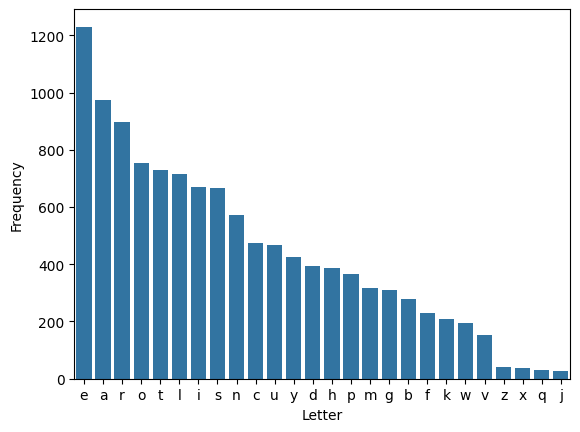

In [9]:
def count_letters(word):
    letter_count = {}
    for letter in word:
        if letter in letter_count:
            letter_count[letter] += 1
        else:
            letter_count[letter] = 1
    return letter_count

WordleSolutions['Letter_Count'] = WordleSolutions['word'].apply(count_letters)

letter_frequency = {}

for index, row in WordleSolutions.iterrows():
    letter_count = row['Letter_Count']
    for letter, frequency in letter_count.items():
        if letter in letter_frequency:
            letter_frequency[letter] += frequency
        else:
            letter_frequency[letter] = frequency

LetterFrequency = pd.DataFrame(list(letter_frequency.items()), columns=['Letter', 'Frequency'])
LetterFrequency = LetterFrequency.sort_values(by='Frequency', ascending=False).reset_index(drop=True)

sns.barplot(LetterFrequency, x='Letter', y='Frequency')

We can observe that the most frequent letters are, e, a, r, o, and t as they occur the most of the 26 letters. 
Is this enough insight to make effective guesses? possibly not.

If we take a closer look at the plot, we can see the other letters are fairly distributed and the difference between the most frequent letters and the rest of the letters are not drastic except for the letters, z, x, q, and j as not as many words contain these letters. Due to the distribution, only examining the frequency of the letters do not provide sufficient insight on making a succesful guess as frequencies of the most frequent letters is not large enough in difference compared to the other letters that would ensure that those letters will be in the wordle.